## People who write a 140-word message or a longer one have a little higher accepted rate than others, but the result is not significant because only 14% people write requests with 140 or less words. I suggest increasing the number of words to 320 so that the increase of accepted rate would be relatively large and more significant. Meanwhile, users should be willing to write a 320-words message because about 43% of users are doing this.
## code and analysis are following:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandasql as pdsql
import datetime as dt
import seaborn as sna
from scipy import stats
%matplotlib inline
users = pd.read_csv('./takehome_assignments.csv')
contacts = pd.read_csv('./takehome_contacts.csv')
users = users.drop_duplicates()
contacts = contacts.drop_duplicates()

In [34]:
ab = (pd.merge(left = contacts,
              right = users,
              left_on = ['id_guest'],
              right_on = ['id_user'],
              how = 'inner'
              )
     )
ab.head()

,id_guest,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,dim_contact_channel,m_first_message_length,id_user,ab
0,f966752c-8533-48b2-af6f-8c6797d2b247,4405ab66-1c68-449b-abd9-1ad1892a6c4d,fe07e0c4-c317-44bc-a82d-5b599a248049,1/1/13 23:04,15:23.0,NaN,NaN,contact_me,230.0,f966752c-8533-48b2-af6f-8c6797d2b247,treatment
1,873f93fb-234c-4cfb-83c7-27ff0e582a8e,aa41b57b-e29f-4c95-bf27-48f27519e419,d47717da-315a-42c2-8888-9b7d4bea8829,1/2/13 0:21,38:31.0,NaN,NaN,contact_me,98.0,873f93fb-234c-4cfb-83c7-27ff0e582a8e,treatment
2,7308791e-04c3-416a-be2d-4188816decc2,8b118ba1-b439-493e-88c7-2c89a81cec1b,ac231804-951c-4fcb-a0e6-1a4aecbfb6ce,1/2/13 2:30,06:10.0,06:10.0,NaN,contact_me,278.0,7308791e-04c3-416a-be2d-4188816decc2,control
3,097c48a4-f4b6-4870-bf29-370e33de868e,140b0847-549d-4c77-bb8c-7cea16914871,727357bd-8031-4e59-b812-22cfa617e031,1/2/13 3:24,49:08.0,NaN,NaN,contact_me,785.0,097c48a4-f4b6-4870-bf29-370e33de868e,control
4,6ff7a902-541b-4eee-ace4-673262b95a94,3633b49c-9f63-499d-a9b1-f1e686832e7b,97c8c06a-0b01-45d1-b9b4-5771aa919f67,1/2/13 7:11,56:39.0,56:39.0,NaN,contact_me,69.0,6ff7a902-541b-4eee-ace4-673262b95a94,control


In [3]:
abc = ab[ab.dim_contact_channel== 'contact_me']
AB = abc.drop(['id_guest','id_listing','id_host','ts_booking_at','dim_contact_channel','id_user'],axis = 1)

In [4]:
AB.head()

,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,m_first_message_length,ab
0,1/1/13 23:04,15:23.0,NaN,230.0,treatment
1,1/2/13 0:21,38:31.0,NaN,98.0,treatment
2,1/2/13 2:30,06:10.0,06:10.0,278.0,control
3,1/2/13 3:24,49:08.0,NaN,785.0,control
4,1/2/13 7:11,56:39.0,56:39.0,69.0,control


In [5]:
AB[AB.ab=='treatment'].count()

ts_interaction_first      4482
ts_reply_at_first         3788
ts_accepted_at_first      1225
m_first_message_length    4482
ab                        4482
dtype: int64

In [6]:
AB[AB.ab=='control'].count()

ts_interaction_first      4488
ts_reply_at_first         3760
ts_accepted_at_first      1242
m_first_message_length    4488
ab                        4488
dtype: int64

In [7]:
DF = AB.fillna('00:00.0')

In [8]:
xyz = lambda x: int(x[0:2])*60+int(x[3:5])

In [9]:
DF['accepted'] = DF.ts_accepted_at_first.apply(xyz).apply(bool).apply(int).apply(float)

In [10]:
DF['replied'] = DF.ts_reply_at_first.apply(xyz).apply(bool).apply(int).apply(float)

In [11]:
DF['mes_len'] = DF.m_first_message_length>=140

In [12]:
DF['mes_len'] =DF['mes_len'].apply(int).apply(float)

In [13]:
DF.head()

,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,m_first_message_length,ab,accepted,replied,mes_len
0,1/1/13 23:04,15:23.0,00:00.0,230.0,treatment,0.0,1.0,1.0
1,1/2/13 0:21,38:31.0,00:00.0,98.0,treatment,0.0,1.0,0.0
2,1/2/13 2:30,06:10.0,06:10.0,278.0,control,1.0,1.0,1.0
3,1/2/13 3:24,49:08.0,00:00.0,785.0,control,0.0,1.0,1.0
4,1/2/13 7:11,56:39.0,56:39.0,69.0,control,1.0,1.0,0.0


In [14]:
GPDF = DF.groupby(['ab'])
print GPDF['accepted'].value_counts(2)
print GPDF['accepted'].value_counts()

ab         accepted
control    0.0         0.723930
           1.0         0.276070
treatment  0.0         0.727354
           1.0         0.272646
Name: accepted, dtype: float64
ab         accepted
control    0.0         3249
           1.0         1239
treatment  0.0         3260
           1.0         1222
Name: accepted, dtype: int64


In [15]:
binary_outcome=['replied','accepted']
for i in binary_outcome:
    print "Chi-square test of contingency table: " + i + " Vs treatment group"
    print GPDF[i].value_counts(2).unstack().fillna(0)
    print "\n"
    print GPDF[i].value_counts().unstack().fillna(0)
    print "\n"
    print stats.chi2_contingency(GPDF[i].value_counts().unstack())
    print "\n"
    print "\n"

Chi-square test of contingency table: replied Vs treatment group
replied         0.0       1.0
ab                           
control    0.162210  0.837790
treatment  0.155065  0.844935


replied    0.0   1.0
ab                  
control    728  3760
treatment  695  3787


(0.80516546290722868, 0.36955345446577093, 1, array([[  711.97591973,  3776.02408027],
       [  711.02408027,  3770.97591973]]))




Chi-square test of contingency table: accepted Vs treatment group
accepted        0.0       1.0
ab                           
control    0.723930  0.276070
treatment  0.727354  0.272646


accepted    0.0   1.0
ab                   
control    3249  1239
treatment  3260  1222


(0.11537277173502974, 0.73410831274020194, 1, array([[ 3256.67692308,  1231.32307692],
       [ 3252.32307692,  1229.67692308]]))






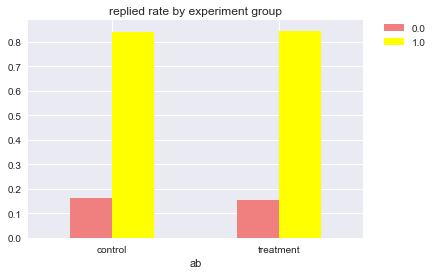

In [16]:
GPDF['replied'].value_counts(2).unstack().plot(kind="bar",color=['lightcoral','yellow'],rot='horizontal',\
                                    title='replied rate by experiment group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

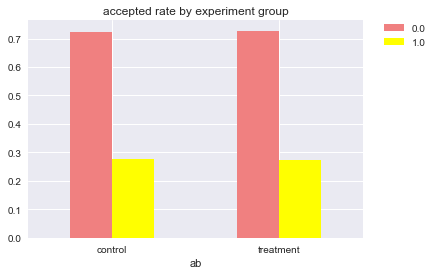

In [17]:
GPDF['accepted'].value_counts(2).unstack().plot(kind="bar",color=['lightcoral','yellow'],rot='horizontal',\
                                    title='accepted rate by experiment group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# According to chi2 test and the plots, there is no obvious different replied rate or accepted rate between control and treatment group.

In [18]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
# check if the requirement meaningful.
a = DF.mes_len[DF.ab == 'treatment']
b = DF.mes_len[DF.ab == 'control']
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))
#check if the treated group has better result
a = DF.accepted[DF.ab == 'treatment']
b = DF.accepted[DF.ab == 'control']
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))
#check if message longer than 140 words results better replied rate.
a = DF.replied[DF.mes_len == 1]
b = DF.replied[DF.mes_len == 0]
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))
#check if message longer than 140 words results better accepted rate.
a = DF.accepted[DF.mes_len == 1]
b = DF.accepted[DF.mes_len == 0]
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 1.432  p = 0.15218
ttest_ind:            t = -0.363293  p = 0.716395
ttest_ind:            t = -0.183783  p = 0.854206
ttest_ind:            t = 0.84074  p = 0.400611


## None of the results are significant.

### The accepted rate and replied rate are not largely influenced by the experiment. So we don't need to stop the experiment but it should be modified.

In [19]:
DF['rep_time'] = DF.ts_reply_at_first.apply(xyz)
DF['acc_time'] = DF.ts_accepted_at_first.apply(xyz)

In [20]:
DF.head()

,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,m_first_message_length,ab,accepted,replied,mes_len,rep_time,acc_time
0,1/1/13 23:04,15:23.0,00:00.0,230.0,treatment,0.0,1.0,1.0,923,0
1,1/2/13 0:21,38:31.0,00:00.0,98.0,treatment,0.0,1.0,0.0,2311,0
2,1/2/13 2:30,06:10.0,06:10.0,278.0,control,1.0,1.0,1.0,370,370
3,1/2/13 3:24,49:08.0,00:00.0,785.0,control,0.0,1.0,1.0,2948,0
4,1/2/13 7:11,56:39.0,56:39.0,69.0,control,1.0,1.0,0.0,3399,3399


In [21]:
meslen_group = range(int(max(DF.m_first_message_length)/10))
meanofrep = [np.mean(DF.rep_time[DF.m_first_message_length>10*i-10][DF.m_first_message_length<=10*i][DF.rep_time!=0]) for i in meslen_group]
meanofacc = [np.mean(DF.acc_time[DF.m_first_message_length>10*i-10][DF.m_first_message_length<=10*i][DF.acc_time!=0]) for i in meslen_group]

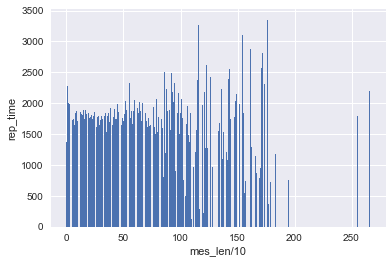

In [22]:
plt.bar(meslen_group,meanofrep)
ax = plt.axes()
ax.set_xlabel('mes_len/10')
ax.set_ylabel('rep_time')

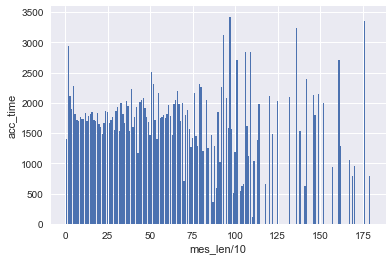

In [23]:
plt.bar(meslen_group,meanofacc)
ax = plt.axes()
ax.set_xlabel('mes_len/10')
ax.set_ylabel('acc_time')

# check the relationship between mes_len and acc_rate.

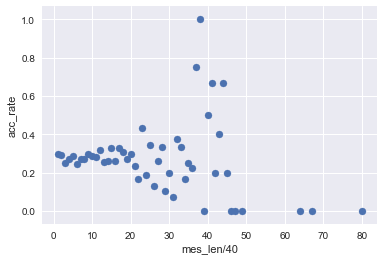

In [33]:
x = meslen_group
y = [np.mean(DF.accepted[DF.m_first_message_length<40*i][DF.m_first_message_length>(40*i-40)]) for i in x]
plt.scatter(x,y)
ax = plt.axes()
ax.set_xlabel('mes_len/40')
ax.set_ylabel('acc_rate')

# According to above 3 plots, there is no obvious linear relationship between mes_len and rep_time, mes_len and acc_time, mes_len and acc_rate.

## use different required number of words to adjust experiment.

In [25]:
for i in meslen_group:
    DF.mes_len = DF.m_first_message_length>10*i
    DF.mes_len = DF.mes_len.apply(int)
    #check if message longer than 10i words results better accepted rate.
    a = DF.accepted[DF.mes_len == 1]
    b = DF.accepted[DF.mes_len == 0]
    t, p = ttest_ind(a, b, equal_var=False)
    print("requirement: 10*%g. ttest_ind:     t = %g  p = %g" % (i,t, p))

/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3126: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


requirement: 10*0. ttest_ind:     t = nan  p = nan
requirement: 10*1. ttest_ind:     t = 0.148907  p = 0.885819
requirement: 10*2. ttest_ind:     t = 0.186704  p = 0.855283
requirement: 10*3. ttest_ind:     t = -0.412332  p = 0.683218
requirement: 10*4. ttest_ind:     t = -0.554142  p = 0.581744
requirement: 10*5. ttest_ind:     t = -0.630229  p = 0.530226
requirement: 10*6. ttest_ind:     t = -0.737385  p = 0.461967
requirement: 10*7. ttest_ind:     t = -0.371365  p = 0.710653
requirement: 10*8. ttest_ind:     t = -0.871687  p = 0.383902
requirement: 10*9. ttest_ind:     t = -0.225925  p = 0.821343
requirement: 10*10. ttest_ind:     t = -0.0178891  p = 0.985732
requirement: 10*11. ttest_ind:     t = -0.236488  p = 0.813106
requirement: 10*12. ttest_ind:     t = 0.636415  p = 0.52463
requirement: 10*13. ttest_ind:     t = 0.956433  p = 0.339017
requirement: 10*14. ttest_ind:     t = 0.811038  p = 0.417454
requirement: 10*15. ttest_ind:     t = 0.526701  p = 0.598456
requirement: 10*16.

requirement: 10*147. ttest_ind:     t = 0.401538  p = 0.690447
requirement: 10*148. ttest_ind:     t = 0.50258  p = 0.618477
requirement: 10*149. ttest_ind:     t = 0.249614  p = 0.804422
requirement: 10*150. ttest_ind:     t = 0.249614  p = 0.804422
requirement: 10*151. ttest_ind:     t = 0.249614  p = 0.804422
requirement: 10*152. ttest_ind:     t = -0.0207646  p = 0.983561
requirement: 10*153. ttest_ind:     t = -0.0207646  p = 0.983561
requirement: 10*154. ttest_ind:     t = 0.0854951  p = 0.932414
requirement: 10*155. ttest_ind:     t = 0.192984  p = 0.848264
requirement: 10*156. ttest_ind:     t = 0.301865  p = 0.764896
requirement: 10*157. ttest_ind:     t = 0.0178254  p = 0.985904
requirement: 10*158. ttest_ind:     t = 0.130827  p = 0.896876
requirement: 10*159. ttest_ind:     t = 0.130827  p = 0.896876
requirement: 10*160. ttest_ind:     t = 0.130827  p = 0.896876
requirement: 10*161. ttest_ind:     t = -0.0578935  p = 0.954291
requirement: 10*162. ttest_ind:     t = -0.39464

requirement: 10*302. ttest_ind:     t = nan  p = nan
requirement: 10*303. ttest_ind:     t = nan  p = nan
requirement: 10*304. ttest_ind:     t = nan  p = nan
requirement: 10*305. ttest_ind:     t = nan  p = nan
requirement: 10*306. ttest_ind:     t = nan  p = nan
requirement: 10*307. ttest_ind:     t = nan  p = nan
requirement: 10*308. ttest_ind:     t = nan  p = nan
requirement: 10*309. ttest_ind:     t = nan  p = nan
requirement: 10*310. ttest_ind:     t = nan  p = nan
requirement: 10*311. ttest_ind:     t = nan  p = nan
requirement: 10*312. ttest_ind:     t = nan  p = nan
requirement: 10*313. ttest_ind:     t = nan  p = nan
requirement: 10*314. ttest_ind:     t = nan  p = nan
requirement: 10*315. ttest_ind:     t = nan  p = nan
requirement: 10*316. ttest_ind:     t = nan  p = nan
requirement: 10*317. ttest_ind:     t = nan  p = nan


## requirement: 10*24. ttest_ind:     t = 1.80298  p = 0.0714259
## requirement: 10*27. ttest_ind:     t = 2.02038  p = 0.0433706
## requirement: 10*28. ttest_ind:     t = 1.97819  p = 0.0479346
## requirement: 10*30. ttest_ind:     t = 1.95209  p = 0.0509551
## requirement: 10*31. ttest_ind:     t = 1.99222  p = 0.0463748
## requirement: 10*32. ttest_ind:     t = 2.05044  p = 0.0403491

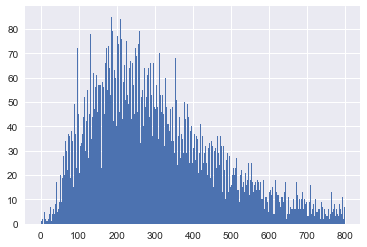

In [26]:
DF.m_first_message_length[DF.m_first_message_length<=800].hist(bins = 300)

In [27]:
float(len(DF.m_first_message_length[DF.m_first_message_length<=140]))/float(len(DF.m_first_message_length))

0.14381270903010032

In [28]:
float(len(DF.m_first_message_length[DF.m_first_message_length<=320]))/float(len(DF.m_first_message_length))

0.5745819397993311

## From the above histogram, we can say that the p-value of the test of 140 words fails because the number of users who write request with 140 words or less is relatively too small.

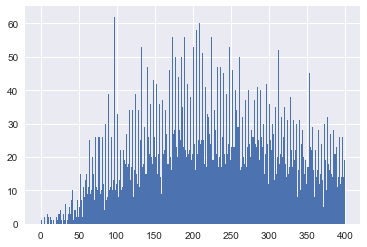

In [29]:
DF.m_first_message_length[DF.m_first_message_length<=400].hist(bins = 300)

## According to the t-tests, the best number of words might be 320. 
## According to the histogram, the number of users doesn't decrease significantly as the number of words increases when the number of words is around 320. 
## So my suggestion for further exiperiment is setting the required number of words as 320. 